# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('...', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [3]:
df.tail()#выведение последних 5 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

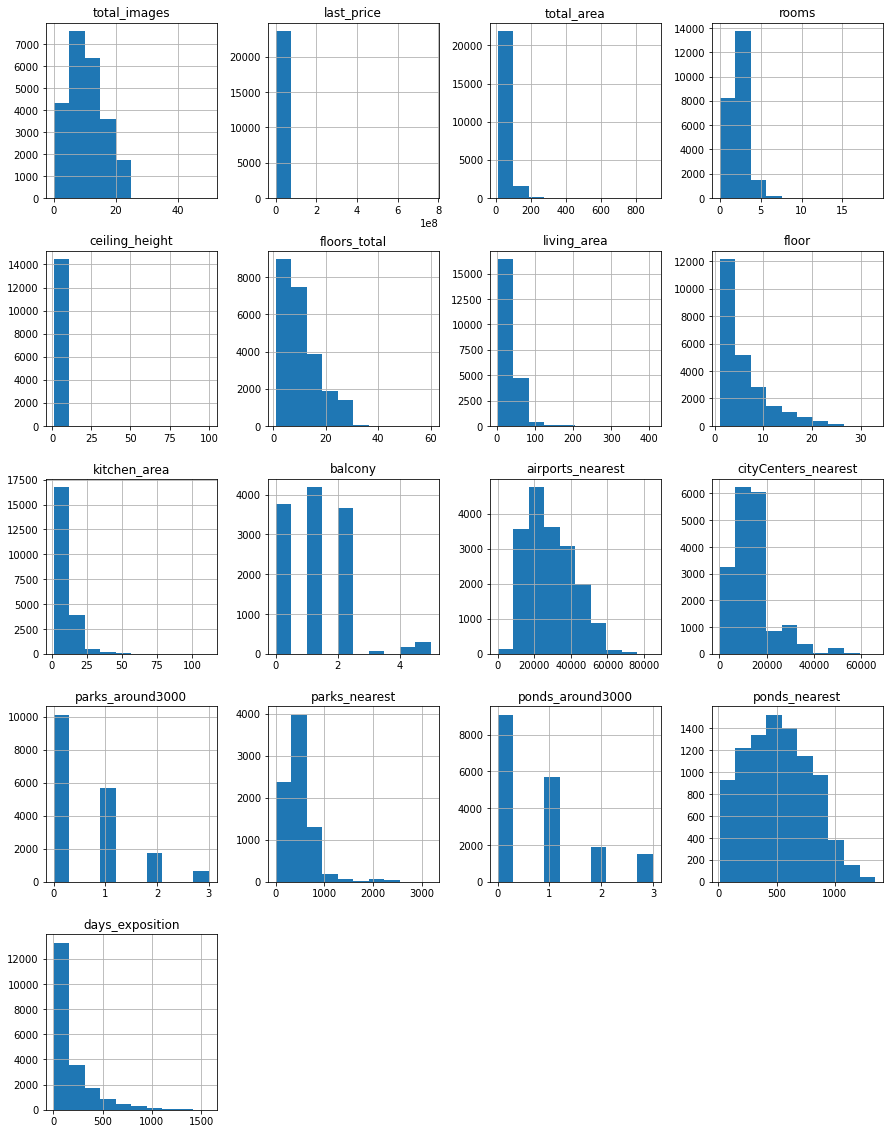

In [5]:
df.hist(figsize=(15, 20));#построение гитограмм по количественным признакам до изменения типов данных

Итак, данные загружены и изучены, они явно требуют некоторой корректировки, поэтому переходим к этапу предобработки данных

### Предобработка данных

#### Типы данных

**Прежде всего проанализируем типы представленных данных и произведем их корректировку**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Преобразуем столбец с датой в соответствующий формать методом to_datetime()

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Приведем столбец, содержащий булевы значения, к соответствующему типу

In [8]:
df['is_apartment'].astype('bool')

0        True
1        True
2        True
3        True
4        True
         ... 
23694    True
23695    True
23696    True
23697    True
23698    True
Name: is_apartment, Length: 23699, dtype: bool

 **Итак, данные преобразованы в соответсвующие своему содержанию типы (в форматы даты, вещественных чисел, булевых значений), что позволит в последующем анализе проводить необходимые операции без возникновения ошибок с данными в соответствии с их типами**

#### Пропущенные значения

**Далее перейдем к обработке пропущенных значений, для начала выведем количество пропущенных значений для каждого столбца**

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Таким образом, пропущенные значения присутствуют практически во всех столбцах датасета, однако устранение их представляется возможным и разумным в таких столбцах как:
- "ceiling_height" (замена на медианное значение по населенному пункту)

- balcony" (исходя из предположения, что информация о количестве балконов не указана ввиду их отсутствия, будет произведена замена всех пропущенных значений на 0)

- 'is_apartment' (замена пропущенных значений на False, так как можно предположить что раз указанный параметр не задан пользователем значит тип продаваемой недвижимости аппартаментами не является)

In [10]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['locality_name'] == i), 'ceiling_height'].median()

In [11]:
df['ceiling_height'].isna().sum()

156

In [12]:
df['balcony'] = df['balcony'].fillna(value=0)

In [13]:
df['balcony'].isna().sum()

0

In [14]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [15]:
df['is_apartment'].isna().sum()

0

**Если говорить о причинах возникновения пропущенных значений в данных, то они могут быть следующими:**

- отсутствие информации в таких столбцах, как "floors_total", "living_area", "is_apartment", "kitchen_area" возможно обусловлено тем, что они заполняются пользователем самостоятельно при публикации обьявления, возможно информация по указанным параментрам не являлась обязательной при формировании обьявления, а также не являлась важной по мнению лица, размещающего обьявление, поэтому указанные сведения внесены не были;

- отсутствие информации в столбцах, касающихся картографической информации, возможно обусловлено тем, что опция рассчета расстояний от продаваемых обьектов недвижимости до центра города, парков и аэропортов была внедрена на сайте публикации обьявлений уже после размещения на нем некоторой части обьявлений;

- отсутствие информации в столбце "days_exposition" возможно связано с тем, что обьявление еще не снято с публикации, а поэтому посчитать количество дней размещения обьявления на сайте, не имея конечной даты, не представляется возможным. 

После работы с пропущенными значениями стало возможным преобразование типа данных в столбце, содержащем сведения о количестве балконов, в тип целого числа

In [16]:
df['balcony'].astype('int64')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

#### Дубликаты

**Теперь перейдем к работе с явными и неявными дубликатами**

In [17]:
df.duplicated().sum()

0

**Явных дубликатов не обнаружено**

In [18]:
df['locality_name'].nunique()

364

In [19]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [20]:
df['locality_name'] = df['locality_name'].str.lower()#приводим все наименования к нижнему регистру

In [21]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')#заменяем некоторые элементы в наименования для унификации их написания к единообразному написанию

In [22]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')#заменяем некоторые элементы в наименования для унификации их написания к единообразному написанию

In [23]:
df['locality_name'] = df['locality_name'].replace('поселок рябово', 'поселок городского типа рябово')#заменяем некоторые элементы в наименования для унификации их написания к единообразному написанию

In [24]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

In [25]:
df['locality_name'].nunique()

322

In [26]:
df.duplicated().sum()

0

**Невных дубликатов также не обнаружено**

#### Аномальные значения

**Теперь поработаем над выявлением и устранением аномальных значений**

##### **total_images**

In [27]:
df['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

В этом столбце не нужно удалять никаких значений, так как все они адекватны и последовательны

##### **last_price**

In [28]:
df['last_price'].sort_values().head(500).unique()

array([  12190.,  430000.,  440000.,  450000.,  470000.,  480000.,
        490000.,  500000.,  520000.,  530000.,  550000.,  560000.,
        565000.,  580000.,  585000.,  590000.,  600000.,  620000.,
        630000.,  650000.,  660000.,  680000.,  690000.,  700000.,
        710000.,  720000.,  730000.,  740000.,  750000.,  760000.,
        770000.,  777000.,  780000.,  790000.,  799000.,  800000.,
        820000.,  850000.,  860000.,  869000.,  870000.,  880000.,
        890000.,  900000.,  910000.,  920000.,  945750.,  950000.,
        965780.,  970000.,  980000.,  990000.,  995000.,  999000.,
        999999., 1000000., 1010000., 1020000., 1030000., 1050000.,
       1060000., 1070000., 1080000., 1090000., 1099000., 1100000.,
       1110000., 1130000., 1150000., 1170000., 1180000., 1190000.,
       1199000., 1200000., 1220000., 1230000., 1240000., 1249000.,
       1250000., 1260000., 1270000., 1280000., 1290000., 1300000.,
       1310000., 1315000., 1320000., 1330000., 1350000.])

In [29]:
df['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [30]:
df['last_price'].quantile(0.99)

36000000.0

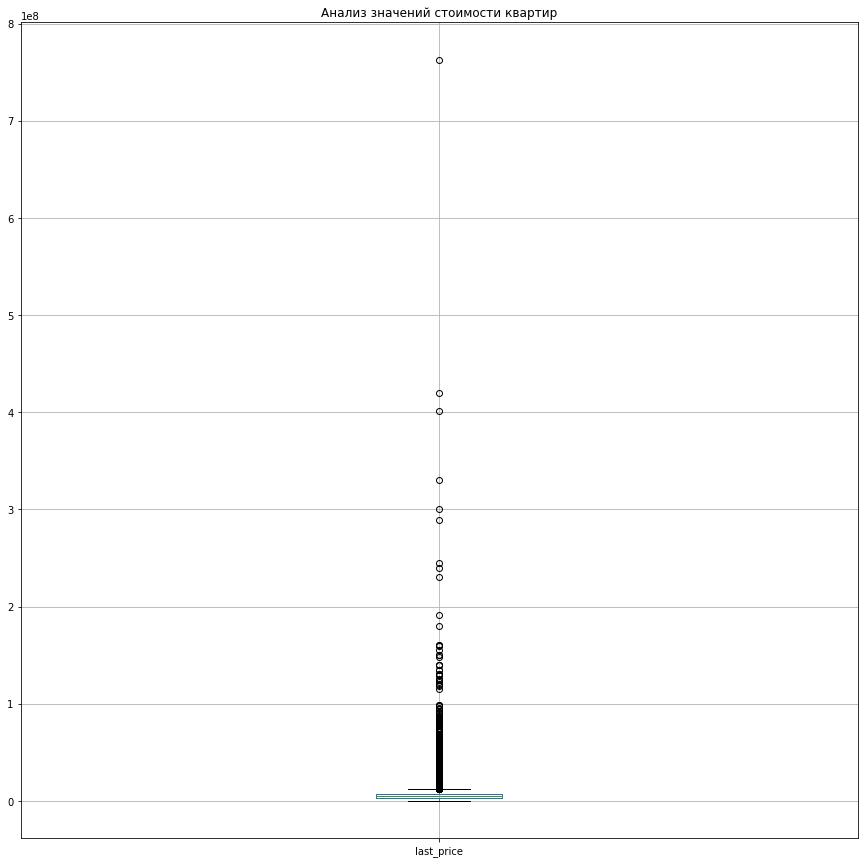

In [31]:
df.boxplot(column=['last_price'], grid=True , figsize=(15, 15))
plt.title('Анализ значений стоимости квартир');

Исходя из анализа спектра значений стоимости квартир, установим следующие границы для данного показателя: 

**430000.00<=df['last_price']<=36000000.0**

##### **total_area**

In [32]:
df['total_area'].describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

In [33]:
df['total_area'].quantile(0.99)

197.21400000000028

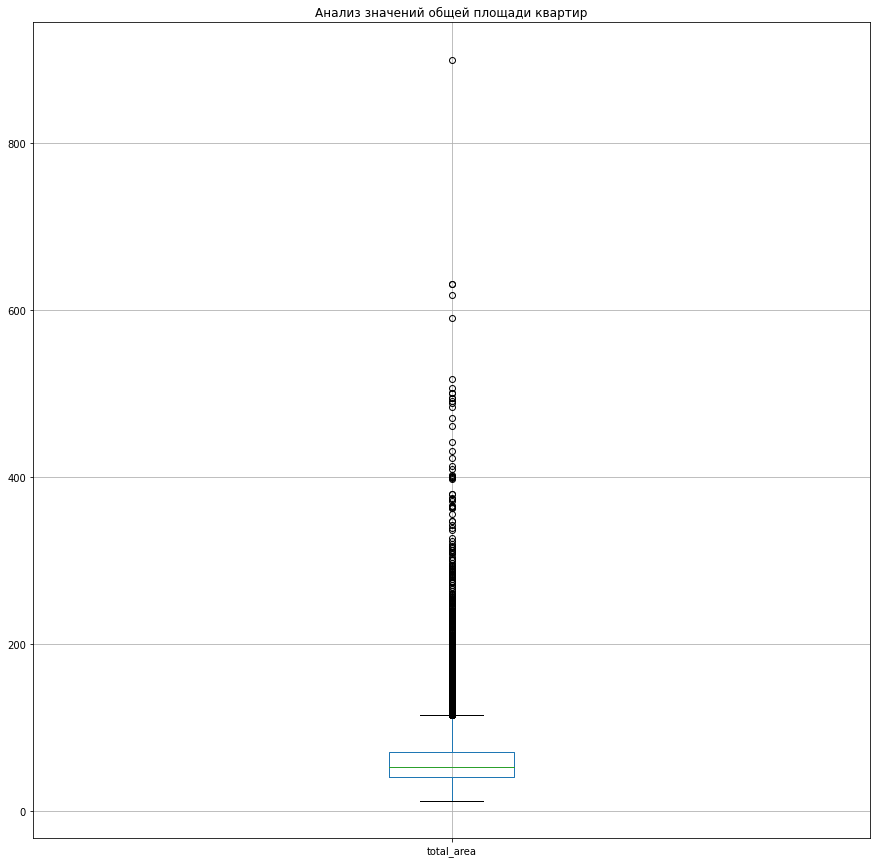

In [34]:
df.boxplot(column=['total_area'], grid=True , figsize=(15, 15))
plt.title('Анализ значений общей площади квартир');

Исходя из анализа спектра значений столбца, установим следующие границы для данного показателя: 

**12.00<=df['total_area']<=200.00**

##### **rooms**

In [35]:
df['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [36]:
df['rooms'].describe()

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [37]:
df['rooms'].quantile(0.99)

5.0

In [38]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

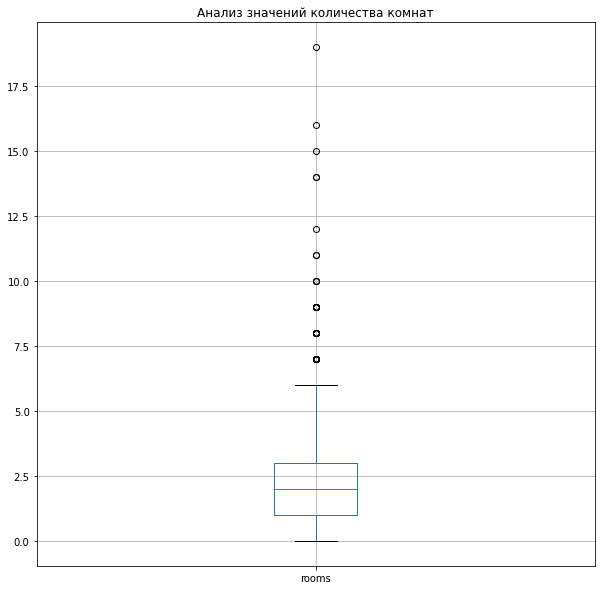

In [39]:
df.boxplot(column=['rooms'], grid=True , figsize=(10, 10))
plt.title('Анализ значений количества комнат');

Исходя из анализа спектра значений столбца, установим следующие границы для данного показателя: 

**0<=df['rooms']<=5**

##### **ceiling_height**

In [40]:
df['ceiling_height'].describe()

count   23543.00
mean        2.73
std         1.01
min         1.00
25%         2.55
50%         2.70
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

In [41]:
df['ceiling_height'].quantile(0.99)

3.65

In [42]:
df['ceiling_height'].sort_values().unique()

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.515,   2.52 ,   2.525,   2.53 ,   2.54 ,
         2.55 ,   2.555,   2.56 ,   2.56 ,   2.57 ,   2.575,   2.58 ,
         2.59 ,   2.6  ,   2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,
         2.63 ,   2.64 ,   2.65 ,   2.65 ,   2.66 ,   2.67 ,   2.675,
         2.68 ,   2.69 ,   2.7  ,   2.71 ,   2.72 ,   2.725,   2.73 ,
         2.74 ,   2.75 ,   2.76 ,   2.77 ,   2.78 ,   2.79 ,   2.8  ,
         2.81 ,   2.82 ,   2.83 ,   2.84 ,   2.85 ,   2.86 ,   2.87 ,
         2.88 ,   2.89 ,   2.9  ,   2.91 ,   2.92 ,   2.93 ,   2.94 ,
         2.95 ,   2.96 ,   2.97 ,   2.98 ,   2.99 ,   3.   ,   3.01 ,
         3.02 ,   3.03 ,   3.04 ,   3.05 ,   3.06 ,   3.07 ,   3.08 ,
         3.09 ,   3.1  ,   3.11 ,   3.12 ,   3.13 ,   3.14 ,   3.15 ,
         3.16 ,   3.17 ,   3.18 ,   3.2  ,   3.21 ,   3.22 ,   3.23 ,
         3.24 ,   3.

В данных имеются явные "описки" при внесении данных, так, скорее всего, потолки с высотой  от 20 до 32 м на самом деле в 10 раз меньше, подправим эти данные ниже

In [43]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 20, df['ceiling_height']/10)

In [44]:
df['ceiling_height'].sort_values().unique()

array([ 1.   ,  1.2  ,  1.75 ,  2.   ,  2.2  ,  2.25 ,  2.26 ,  2.3  ,
        2.34 ,  2.4  ,  2.45 ,  2.46 ,  2.47 ,  2.48 ,  2.49 ,  2.5  ,
        2.51 ,  2.515,  2.52 ,  2.525,  2.53 ,  2.54 ,  2.55 ,  2.555,
        2.56 ,  2.56 ,  2.57 ,  2.575,  2.58 ,  2.59 ,  2.6  ,  2.6  ,
        2.61 ,  2.615,  2.62 ,  2.625,  2.63 ,  2.64 ,  2.65 ,  2.65 ,
        2.66 ,  2.67 ,  2.675,  2.68 ,  2.69 ,  2.7  ,  2.71 ,  2.72 ,
        2.725,  2.73 ,  2.74 ,  2.75 ,  2.76 ,  2.77 ,  2.78 ,  2.79 ,
        2.8  ,  2.81 ,  2.82 ,  2.83 ,  2.84 ,  2.85 ,  2.86 ,  2.87 ,
        2.88 ,  2.89 ,  2.9  ,  2.91 ,  2.92 ,  2.93 ,  2.94 ,  2.95 ,
        2.96 ,  2.97 ,  2.98 ,  2.99 ,  3.   ,  3.01 ,  3.02 ,  3.03 ,
        3.04 ,  3.05 ,  3.06 ,  3.07 ,  3.08 ,  3.09 ,  3.1  ,  3.11 ,
        3.12 ,  3.13 ,  3.14 ,  3.15 ,  3.16 ,  3.17 ,  3.18 ,  3.2  ,
        3.21 ,  3.22 ,  3.23 ,  3.24 ,  3.25 ,  3.26 ,  3.27 ,  3.28 ,
        3.29 ,  3.3  ,  3.31 ,  3.32 ,  3.33 ,  3.34 ,  3.35 ,  3.36 ,
      

In [45]:
df['ceiling_height'] = df['ceiling_height'].where((df['ceiling_height'] >= 2.6) & (df['ceiling_height'] <= 3.6), df['ceiling_height'].median())

In [46]:
df['ceiling_height'].sort_values().unique()

array([2.6  , 2.61 , 2.615, 2.62 , 2.625, 2.63 , 2.64 , 2.65 , 2.65 ,
       2.66 , 2.67 , 2.675, 2.68 , 2.69 , 2.7  , 2.71 , 2.72 , 2.725,
       2.73 , 2.74 , 2.75 , 2.76 , 2.77 , 2.78 , 2.79 , 2.8  , 2.81 ,
       2.82 , 2.83 , 2.84 , 2.85 , 2.86 , 2.87 , 2.88 , 2.89 , 2.9  ,
       2.91 , 2.92 , 2.93 , 2.94 , 2.95 , 2.96 , 2.97 , 2.98 , 2.99 ,
       3.   , 3.01 , 3.02 , 3.03 , 3.04 , 3.05 , 3.06 , 3.07 , 3.08 ,
       3.09 , 3.1  , 3.11 , 3.12 , 3.13 , 3.14 , 3.15 , 3.16 , 3.17 ,
       3.18 , 3.2  , 3.21 , 3.22 , 3.23 , 3.24 , 3.25 , 3.26 , 3.27 ,
       3.28 , 3.29 , 3.3  , 3.31 , 3.32 , 3.33 , 3.34 , 3.35 , 3.36 ,
       3.37 , 3.38 , 3.39 , 3.4  , 3.42 , 3.43 , 3.44 , 3.45 , 3.46 ,
       3.47 , 3.48 , 3.49 , 3.5  , 3.51 , 3.52 , 3.53 , 3.54 , 3.55 ,
       3.56 , 3.57 , 3.58 , 3.59 , 3.6  ])

Таким образом, через замену нестандартно низких и нестандартно высоких потолков медианным занчением мы избавились от аномально низких/нереалистичных значений по данному показателю

Исходя из анализа спектра значений столбца, установим следующие границы для данного показателя: 

**2.6<df['ceiling_height']<3.6**

##### **floors_total**

In [47]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Данные в этом столбце также достаточно равномерны, никаких чисток не требуется

##### **living_area**

In [48]:
df['living_area'].describe()

count   21796.00
mean       34.46
std        22.03
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

In [49]:
df['living_area'].quantile(0.99)

120.0

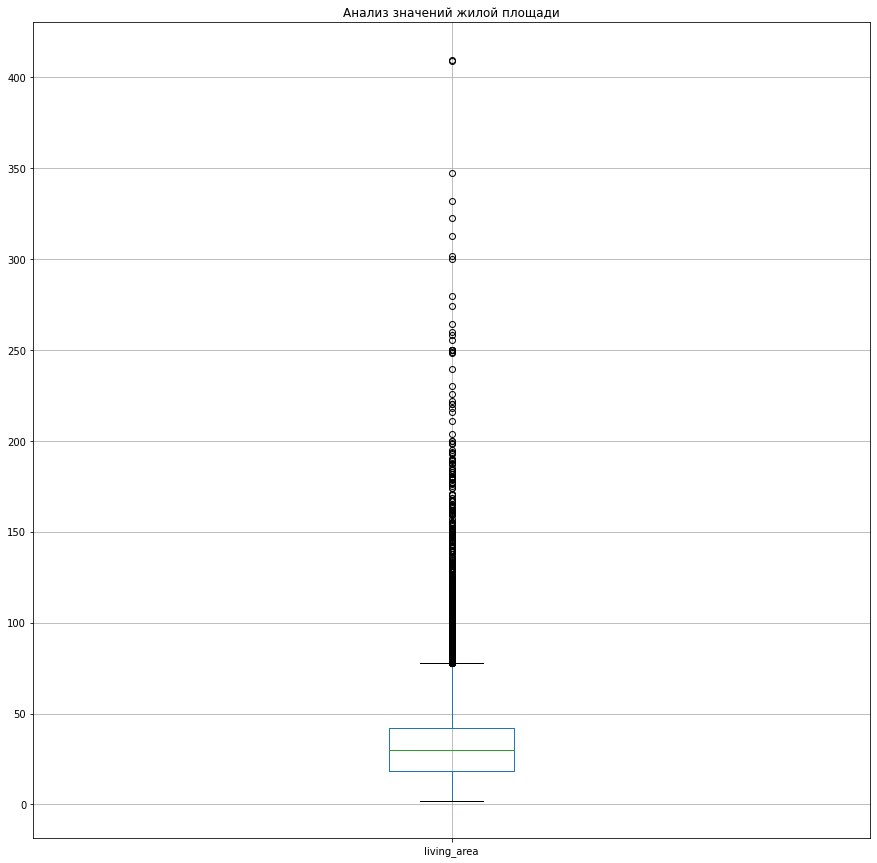

In [50]:
df.boxplot(column=['living_area'], grid=True , figsize=(15, 15))
plt.title('Анализ значений жилой площади');

In [51]:
df['living_area'].sort_values().head(100).unique()

array([ 2.  ,  3.  ,  5.  ,  5.4 ,  6.  ,  6.5 ,  8.  ,  8.3 ,  8.4 ,
        8.5 ,  8.9 ,  9.  ,  9.1 ,  9.8 , 10.  , 10.08, 10.3 , 10.4 ,
       10.5 , 10.52, 10.55, 10.6 , 10.7 , 10.76, 10.8 , 10.9 , 10.93,
       10.94, 11.  ])

Исходя из анализа спектра значений столбца, установим следующие границы для данного показателя: 

**2.0<=df['living_area']<=120.0**

##### **floor**

In [52]:
df['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

Данные в этом столбце также достаточно равномерны, никаких чисток не требуется

##### **kitchen_area**

In [53]:
df['kitchen_area'].describe()

count   21421.00
mean       10.57
std         5.91
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

In [54]:
df['kitchen_area'].quantile(0.99)

35.08999999999996

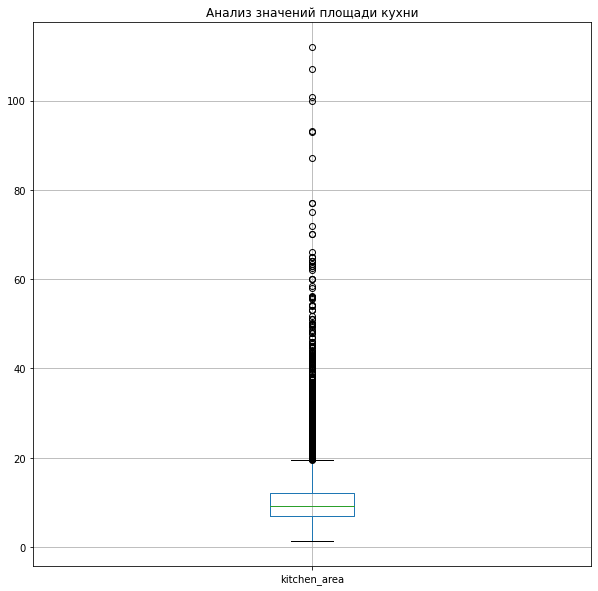

In [55]:
df.boxplot(column=['kitchen_area'], grid=True , figsize=(10, 10))
plt.title('Анализ значений площади кухни');

Исходя из анализа спектра значений столбца, установим следующие границы для данного показателя: 

**1.30<df['kitchen_area']<36.0**

##### **balcony**

In [56]:
df['balcony'].sort_values().unique()

array([0., 1., 2., 3., 4., 5.])

Данные в этом столбце также достаточно равномерны, никаких чисток не требуется

##### **airports_nearest**

In [57]:
df['airports_nearest'].describe()

count   18157.00
mean    28793.67
std     12630.88
min         0.00
25%     18585.00
50%     26726.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

Ввиду того, что аномальные значения указанного столбца скорее всего не будут искажать результаты дальнейшего анализа, аномальные значения в нем можно оставить

##### **cityCenters_nearest**

In [58]:
df['cityCenters_nearest'].describe()

count   18180.00
mean    14191.28
std      8608.39
min       181.00
25%      9238.00
50%     13098.50
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

Ввиду того, что аномальные значения указанного столбца скорее всего не будут искажать результаты дальнейшего анализа, аномальные значения в нем можно оставить

##### **parks_around3000**

In [59]:
df['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Данные в этом столбце также достаточно равномерны, никаких чисток не требуется

##### **parks_nearest**

In [60]:
df['parks_nearest'].describe()

count   8079.00
mean     490.80
std      342.32
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

Ввиду того, что аномальные значения указанного столбца скорее всего не будут искажать результаты дальнейшего анализа, аномальные значения в нем можно оставить

##### **ponds_around3000**

In [61]:
df['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Данные в этом столбце также достаточно равномерны, никаких чисток не требуется

##### **ponds_nearest**

In [62]:
df['ponds_nearest'].describe()

count   9110.00
mean     517.98
std      277.72
min       13.00
25%      294.00
50%      502.00
75%      729.00
max     1344.00
Name: ponds_nearest, dtype: float64

Ввиду того, что аномальные значения указанного столбца скорее всего не будут искажать результаты дальнейшего анализа, аномальные значения в нем можно оставить

##### **days_exposition**

In [63]:
df['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Ввиду того, что аномальные значения указанного столбца скорее всего не будут искажать результаты дальнейшего анализа, аномальные значения в нем можно оставить

##### **Удаление выбросов во всех столбцах датафрейма**

In [64]:
df = df.query('(430000.00<=last_price<=36000000.0) and (12.00<=total_area<=200.0) and ((2.0<=living_area<=120.0) | (living_area.isnull() == True)) and ((1.30<=kitchen_area<=36.0) | (kitchen_area.isnull() == True)) and (0<=rooms<=5)')

In [65]:
df.shape[0]

23120

Итого, после работы над выбросами в исследуемом датафрейме осталось 23 120 строк, что составляет около 97 % от первоначального объема данных

### Посчитайте и добавьте в таблицу новые столбцы

Вычисляем стоимость одного квадратного метра недвижимости:

In [66]:
df['price_1_m'] = (df['last_price']/df['total_area']).round(2)

Отображаем день, месяц и год публикации объявления:

In [67]:
df['days_publ'] = df['first_day_exposition'].dt.weekday

In [68]:
df['month_publ'] = df['first_day_exposition'].dt.month

In [69]:
df['year_publ'] = df['first_day_exposition'].dt.year

Создаем функцию для проведения категоризации этажей по типам, применяем ее, результат заносим в новый столбец:

In [70]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
            
    if row['floor'] == row['floors_total']:
        return 'последний'
                    
    return 'другой'

In [71]:
df['type_floor'] = df.apply(categorize_floor, axis=1)

Рассчитываем расстояние до центра города в километрах:

In [72]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).round() 

In [73]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,days_publ,month_publ,year_publ,type_floor,cityCenters_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.63,11.00,18.60,1,False,False,False,11.00,2.00,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.70,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
5,10,2890000.00,30.40,2018-09-10,1,2.60,12.00,14.40,5,False,False,False,9.10,0.00,поселок городского типа янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой,NaN
6,6,3700000.00,37.30,2017-11-02,1,2.64,26.00,10.60,6,False,False,False,14.40,1.00,поселок парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71,3,11,2017,другой,19.00


### Проведите исследовательский анализ данных

#### Для начала проанализируем основные признаки продаваемых обьектов недвижимости

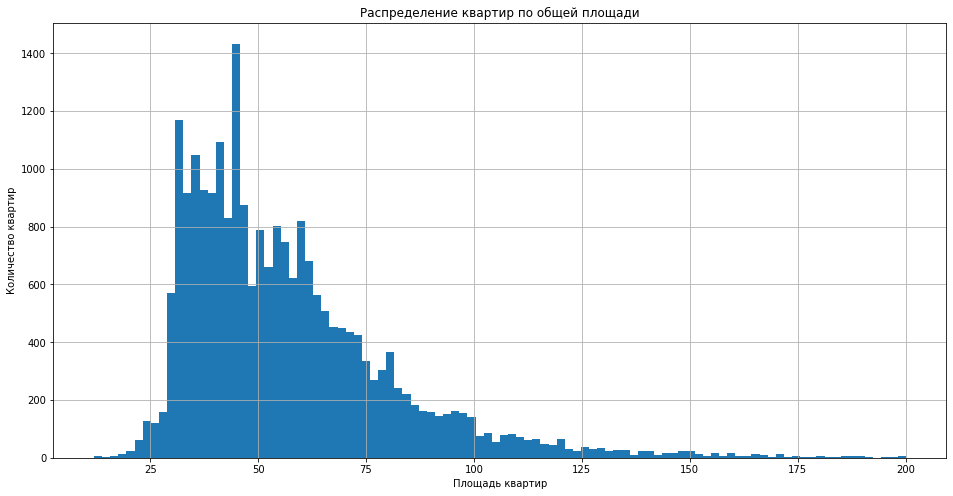

In [74]:
df['total_area'].hist(bins = 100, figsize=(16, 8))
plt.title('Распределение квартир по общей площади')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество квартир');

    Так, если говорить о площади продаваемых квартир, то преимущественно продают квартиры площадью от 30 до 65 квадратных метров.

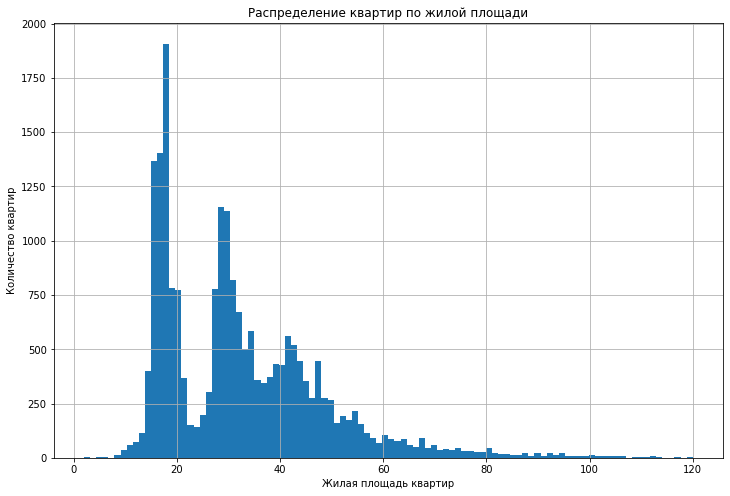

In [75]:
df['living_area'].hist(bins = 100, figsize=(12, 8))
plt.title('Распределение квартир по жилой площади')
plt.xlabel('Жилая площадь квартир')
plt.ylabel('Количество квартир');

Если говорить об общей жилой площади, то здесь наиболее популярным значением является размер либо около 18 метров квадратных либо около 30 метров квадратных.

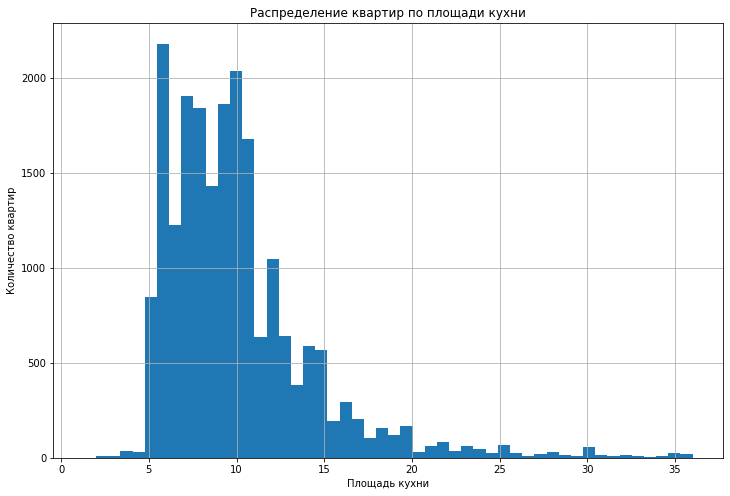

In [76]:
df['kitchen_area'].hist(bins = 50, figsize=(12, 8))
plt.title('Распределение квартир по площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир');

Наиболее часто встречаемые в продаже квартиры с площадью кухни от 6 до 12 метров квадратных.

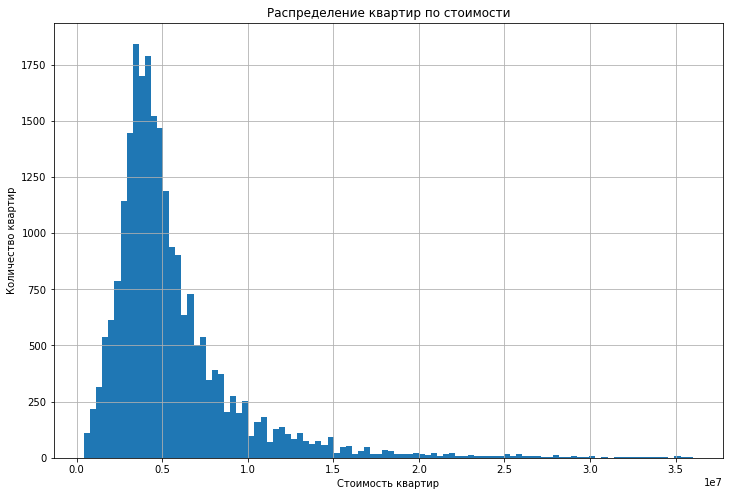

In [77]:
df['last_price'].hist(bins = 100, figsize=(12, 8))
plt.title('Распределение квартир по стоимости')
plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир');

Средняя стоимость продаваемых квартир варьируется от 2,5 до 5 миллионов рублей.

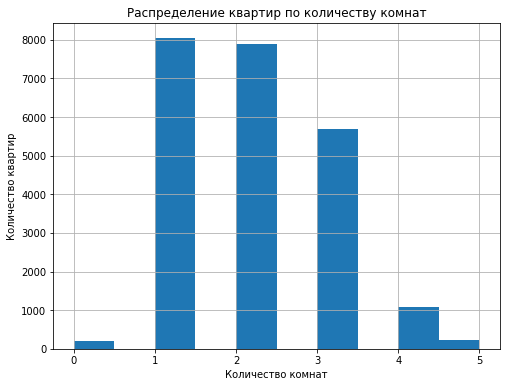

In [78]:
df['rooms'].hist(bins = 10, figsize=(8, 6))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир');

Чаще выставляют на продажу в примерно равном количестве однокомнатные и двухкомнатные квартиры.

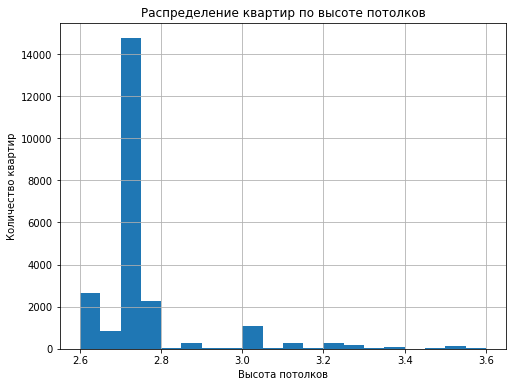

In [79]:
df['ceiling_height'].hist(bins = 20, figsize=(8, 6))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир');

Средняя высота потолков приближена к стандратному значению в 2,7 метра.

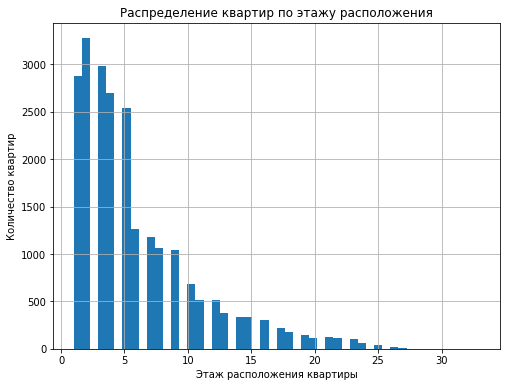

In [80]:
df['floor'].hist(bins = 50, figsize=(8, 6))
plt.title('Распределение квартир по этажу расположения')
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Количество квартир');

    Большинство квартир продается на уровне не выше 6 этажа.

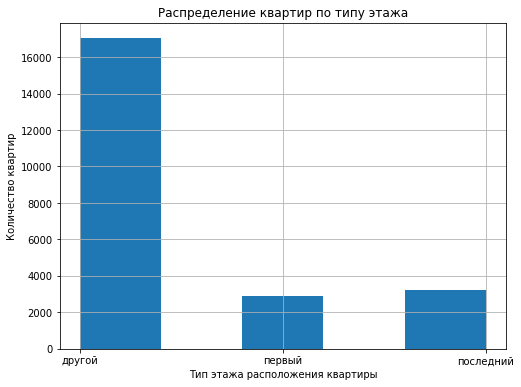

In [81]:
df['type_floor'].hist(bins = 5, figsize=(8, 6))
plt.title('Распределение квартир по типу этажа')
plt.xlabel('Тип этажа расположения квартиры')
plt.ylabel('Количество квартир');

 Продажа квартир преимущественно происходит не на первом и не на последнем этажах.

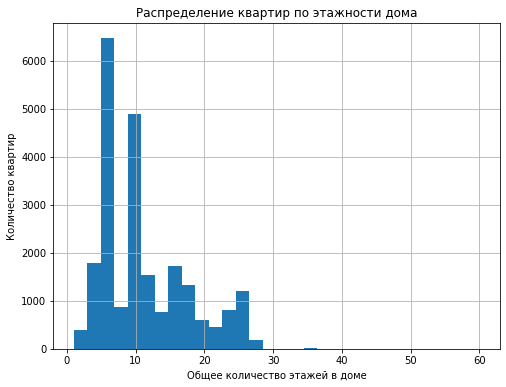

In [82]:
df['floors_total'].hist(bins = 30, figsize=(8, 6))
plt.title('Распределение квартир по этажности дома')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество квартир');

Продажа квартир преимущественно происходит в многоквартирных 5-тиэтажных и 10-тиэтажных домах.

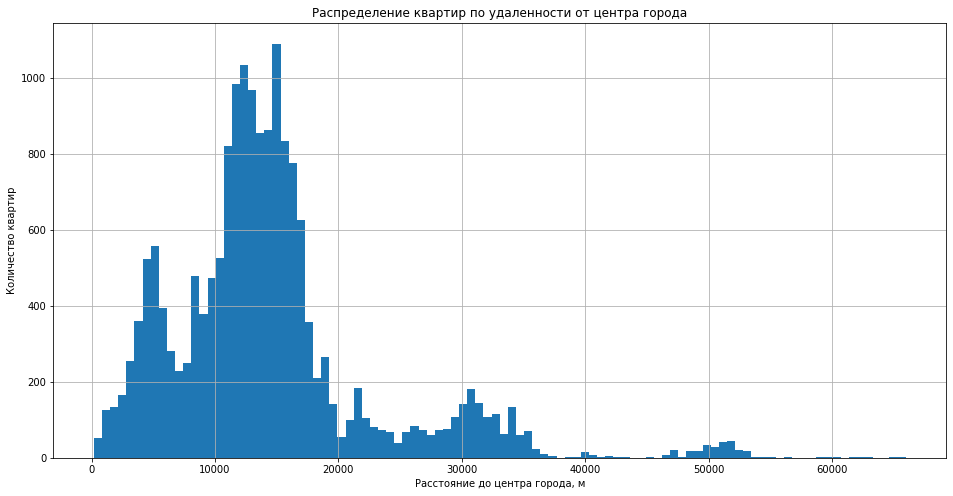

In [83]:
df['cityCenters_nearest'].hist(bins = 100, figsize=(16, 8))
plt.title('Распределение квартир по удаленности от центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество квартир');

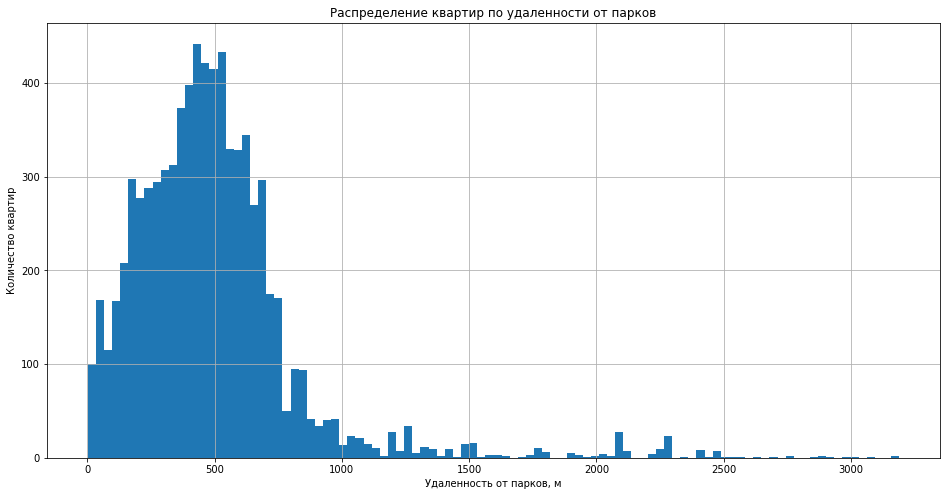

In [84]:
df['parks_nearest'].hist(bins = 100, figsize=(16, 8))
plt.title('Распределение квартир по удаленности от парков')
plt.xlabel('Удаленность от парков, м')
plt.ylabel('Количество квартир');

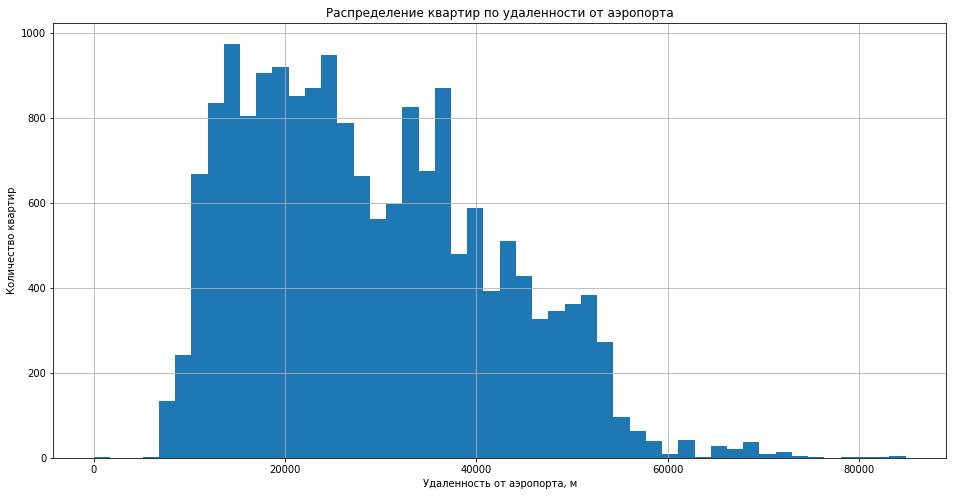

In [85]:
df['airports_nearest'].hist(bins = 50, figsize=(16, 8))
plt.title('Распределение квартир по удаленности от аэропорта')
plt.xlabel('Удаленность от аэропорта, м')
plt.ylabel('Количество квартир');

 Чаще у продаваемых квартир вблизи находятся парки (на расстоянии 400-600 метров), несколько дальше от них расположен центр города (от 11 до 16 километров), а удаленность аэропорта чаще оценивается несколькими показателями - от 10 до 30 километров. 

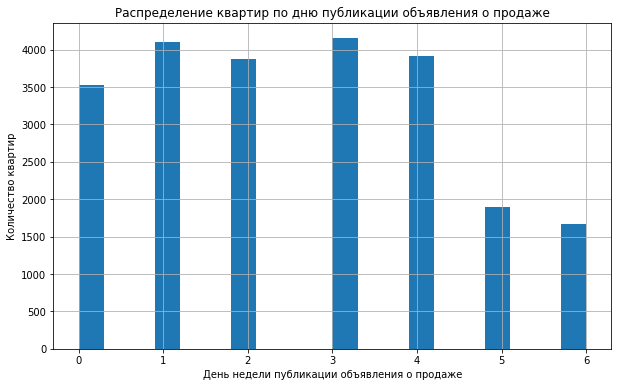

In [86]:
df['days_publ'].hist(bins = 20, figsize=(10, 6))
plt.title('Распределение квартир по дню публикации объявления о продаже')
plt.xlabel('День недели публикации объявления о продаже')
plt.ylabel('Количество квартир');

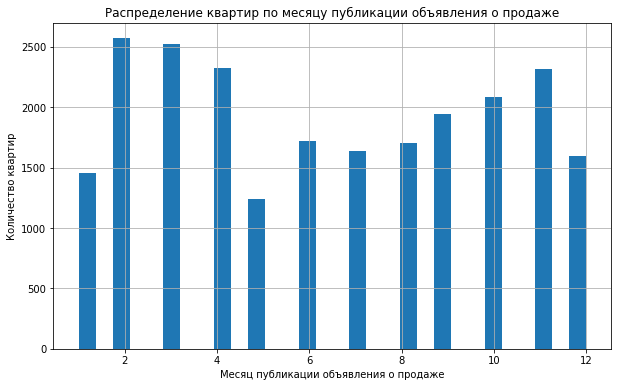

In [87]:
df['month_publ'].hist(bins = 30, figsize=(10, 6))
plt.title('Распределение квартир по месяцу публикации объявления о продаже')
plt.xlabel('Месяц публикации объявления о продаже')
plt.ylabel('Количество квартир');

Если говорить о распределении времени публикации обьявлений, то здесь прослеживаются следующие распределения: чаще публкуются обьявления о продаже в будние дни, c февраля по апрель, а также в конце года в октябре-ноябре.

#### Теперь изучим скорость продаж квартир

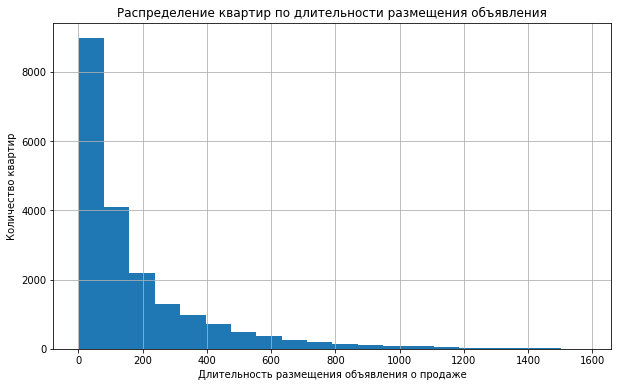

In [88]:
df['days_exposition'].hist(bins=20, figsize=(10, 6))
plt.title('Распределение квартир по длительности размещения объявления')
plt.xlabel('Длительность размещения объявления о продаже')
plt.ylabel('Количество квартир');

In [89]:
df['days_exposition'].describe().round(2)

count   20095.00
mean      178.32
std       216.92
min         1.00
25%        44.00
50%        94.00
75%       228.00
max      1580.00
Name: days_exposition, dtype: float64

In [90]:
df['days_exposition'].median().round(2)

94.0

Итак, анализ длительности размещения обьявлений, выраженной в днях, можно сделать вывод о том, что в среднем квартиры продаются 94 дня, то есть около 3 месяцев (оценка по показателю медианы более справедлива, так как разброс значений показателя достаточно велик, что не позволяет использовать именно рассчетное среднее значение), продажи длительностью менее 44 дней (то есть около 1,5 месяцев) можно охарактеризовать как быстрые, а продажи, продлившиеся более 228 дней (примерно около 8 месяцев) - необычно долгими.

#### Факторы, влияющие на общую (полную) стоимость квартир

**Для начала оценим влияние на цену количественных признаков, для чего создадим датафрейм только из необходимых для анализа столбцов, содержащих соответствующие признаки**

In [91]:
df_corr = df[['last_price', 'total_area', 'living_area', 'kitchen_area']]
df_corr.head()

,last_price,total_area,living_area,kitchen_area
0,13000000.00,108.00,51.00,25.00
1,3350000.00,40.40,18.60,11.00
2,5196000.00,56.00,34.30,8.30
5,2890000.00,30.40,14.40,9.10
6,3700000.00,37.30,10.60,14.40


Для опеределения влияния конкретных факторов на цену продаваемого объекта высчитаем коэффициент корреляции между признаками

In [92]:
df_corr.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.77,0.66,0.57
total_area,0.77,1.00,0.92,0.55
living_area,0.66,0.92,1.00,0.31
kitchen_area,0.57,0.55,0.31,1.00


Далее визуализируем результат через построение матрицы диаграмм рассеяния

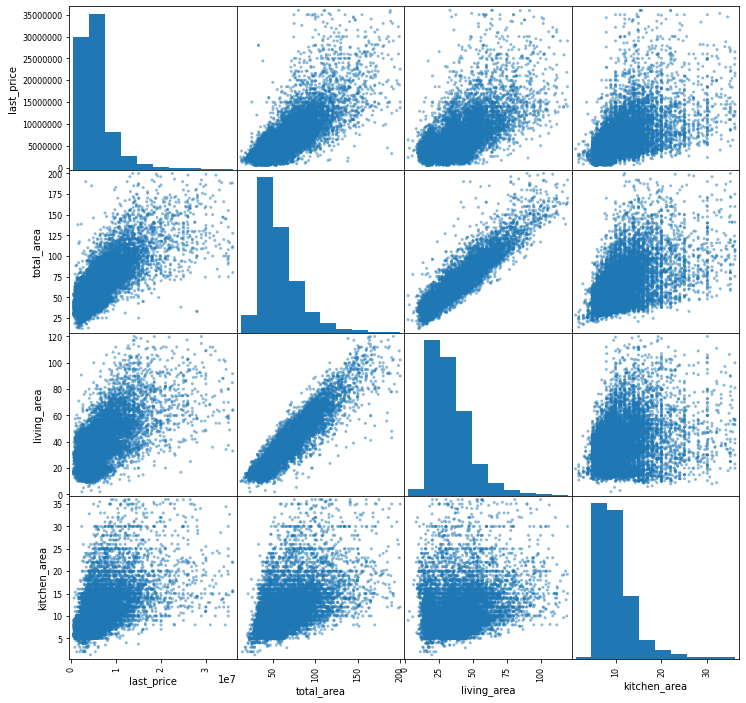

In [93]:
pd.plotting.scatter_matrix(df_corr, figsize=(12, 12));

**Представленные диаграммы наглядно свидетельствуют о том, что существует прямая взаимосвязь между стоимостью квартиры и ее общей и жилой площадями, а также площадью кухни, наиболее четко эта взаимосвязь прослеживается именно на показателе общей площади**

**Теперь рассмотрим влияние на стоимость квартир ряда качественных признаков**

**Далее рассмотрим взаимосвязь цен на квартиры и количества комнат в них**

In [94]:
df_rooms = df.pivot_table(index='rooms', values='last_price', aggfunc='median').round(2)
df_rooms

,last_price
rooms,
0,2700000.00
1,3600000.00
2,4750000.00
3,6100000.00
4,8500000.00
5,11900000.00


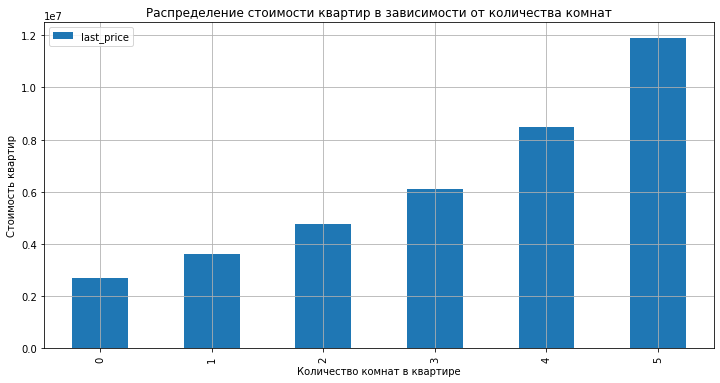

In [95]:
df_rooms.plot(kind='bar', grid=True, figsize=(12, 6))
plt.title('Распределение стоимости квартир в зависимости от количества комнат')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Стоимость квартир');

**Из представленной выше информации можно сделать вывод о том, что цена квартиры также прямопропорциональна количеству комнат в ней, и она равномерно увеличивается с увеличением количества комнат в квартире**

**Далее рассмотрим взаимосвязь цены на квартиру и этажа ее расположения**

In [96]:
df_type_floor = df.pivot_table(index='type_floor', values='last_price', aggfunc='median').round(2)
df_type_floor

,last_price
type_floor,
другой,4780000.00
первый,3899000.00
последний,4200000.00


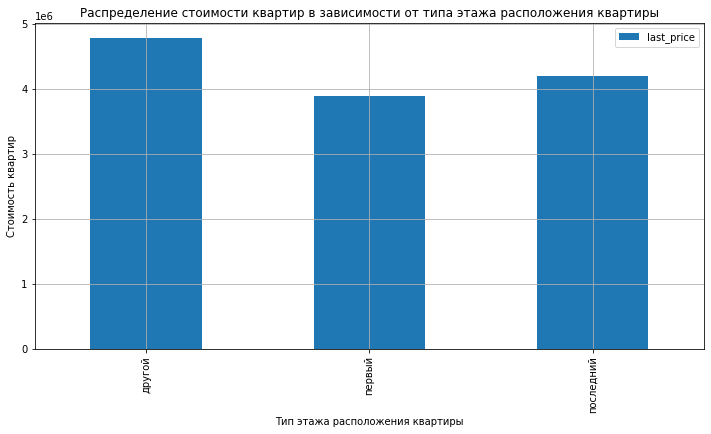

In [97]:
df_type_floor.plot(kind='bar', grid=True, figsize=(12, 6))
plt.title('Распределение стоимости квартир в зависимости от типа этажа расположения квартиры')
plt.xlabel('Тип этажа расположения квартиры')
plt.ylabel('Стоимость квартир');

**Из представленной выше информации можно сделать вывод о том, что тип этажа квартиры также оказывает влияние на цену, цены на квартиры не на первом и не на последнем этажах несколько выше**

**Далее рассмотрим взаимосвязь цены на квартиру и дня недели публикации объявления о ее продаже**

In [98]:
df_days_publ = df.pivot_table(index='days_publ', values='last_price', aggfunc='median').round(2)
df_days_publ

,last_price
days_publ,
0,4600000.00
1,4677500.00
2,4605000.00
3,4550000.00
4,4500000.00
5,4500000.00
6,4500000.00


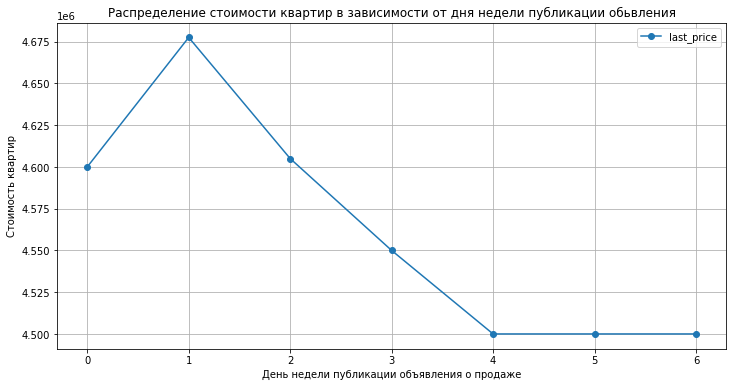

In [99]:
df_days_publ.plot(style='o-', grid=True, figsize=(12, 6))
plt.title('Распределение стоимости квартир в зависимости от дня недели публикации обьвления')
plt.xlabel('День недели публикации объявления о продаже')
plt.ylabel('Стоимость квартир');

**Из представленной выше информации можно сделать вывод о том, что объявления, опубликованные в выходные дни, имеют немного более низкую цену, нежели обьявления, опубликованные в будние дни, однако разбег в разнице цены достаточно мал, поэтому день размещения объявления о продаже квартиры не оказывает  существенного влияния на ее цену**

**Далее рассмотрим взаимосвязь цены на квартиру и месяца, в котором произошла публикация объявления о ее продаже**

In [100]:
df_month_publ = df.pivot_table(index='month_publ', values='last_price', aggfunc='median').round(2)
df_month_publ

,last_price
month_publ,
1,4550000.00
2,4600000.00
3,4594500.00
4,4700000.00
5,4500000.00
6,4350000.00
7,4575000.00
8,4500000.00
9,4650000.00


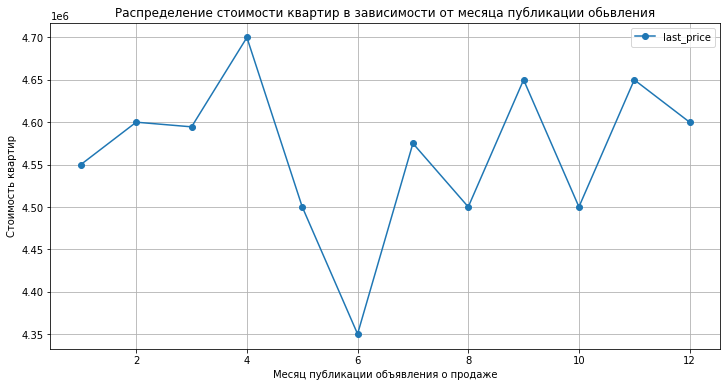

In [101]:
df_month_publ.plot(style='o-', grid=True, figsize=(12, 6))
plt.title('Распределение стоимости квартир в зависимости от месяца публикации обьвления')
plt.xlabel('Месяц публикации объявления о продаже')
plt.ylabel('Стоимость квартир');

**Из представленной выше информации можно сделать вывод о том, что объявления, опубликованные ближе к середине года, имеют немного более низкую цену, нежели обьявления, опубликованные в начале и конце года, однако разбег в разнице цены достаточно мал, поэтому месяц размещения объявления о продаже квартиры также не оказывает  влияния на ее цену**

**Далее рассмотрим взаимосвязь цены на квартиру и года, в котором произошла публикация объявления о ее продаже**

In [102]:
df_year_publ = df.pivot_table(index='year_publ', values='last_price', aggfunc='median').round(2)
df_year_publ

,last_price
year_publ,
2014,7300000.00
2015,5144000.00
2016,4450000.00
2017,4450000.00
2018,4500000.00
2019,5000000.00


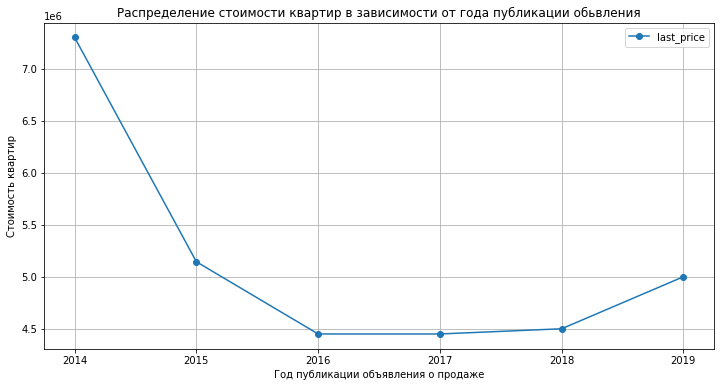

In [103]:
df_year_publ.plot(style='o-', grid=True, figsize=(12, 6))
plt.title('Распределение стоимости квартир в зависимости от года публикации обьвления')
plt.xlabel('Год публикации объявления о продаже')
plt.ylabel('Стоимость квартир');

**Из представленной выше информации можно сделать вывод о том, что после 2014 года цены на квартиры резко падали, получив свой минимум в 2016 году, после чего наметился их постепенный рост вплоть до 2019 года, причем разница средней цены 2014 года и 2019 достаточно велика, из чего следует, что год публикации объявления о продаже квартиры существенно влияет на ее цену**

####  Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для начала сгруппируем данные в сводную таблицу по наименованию населенных пунктов с указанием количества выставленных объявлений о продаже и средней стоимостью этих обьявлений

In [104]:
df_1 = df.pivot_table(index='locality_name', values='price_1_m', aggfunc=['count', 'median']).round(2)
df_1

,count,median
,price_1_m,price_1_m
locality_name,,
бокситогорск,16,17361.11
волосово,36,39906.32
волхов,111,35000.00
всеволожск,398,65789.47
выборг,237,58158.32
...,...,...
сосновый бор,86,74445.16
сясьстрой,24,34983.90


In [105]:
df_1.columns = ['col_publ', 'price_1_m_mean']
df_1

,col_publ,price_1_m_mean
locality_name,,
бокситогорск,16,17361.11
волосово,36,39906.32
волхов,111,35000.00
всеволожск,398,65789.47
выборг,237,58158.32
...,...,...
сосновый бор,86,74445.16
сясьстрой,24,34983.90
тихвин,49,40396.34


Далее выведем показатели средней цены продаваемых объектов недвижимости в 10 населенных пунктах с наибольшим количеством выставленных на продажу квартир

In [106]:
df_1.sort_values(by='col_publ', ascending=False).head(10)

,col_publ,price_1_m_mean
locality_name,,
санкт-петербург,15172,104245.39
поселок мурино,555,85714.29
поселок шушары,439,76923.08
всеволожск,398,65789.47
пушкин,358,99865.72
колпино,337,74722.22
поселок парголово,326,91780.22
гатчина,307,67796.61
деревня кудрово,298,91930.24


Таким образом, на основе проведенных рассчетов делаем вывод о том, что большинство выставленых на продажу квартир сосредоточено в таких населенных пунктах, как Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг. Квартиры с самой высокой средней стоимостью квадратного метра, равной 104 245.39 руб., располагаются в г. Санкт-Петербурге, с самой низкой (58 158.32 руб.) - в Выборге

#### Расчет средней цены километра

In [107]:
df_2 = df.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median').round(2)
df_2

,last_price
cityCenters_nearest_km,
0.00,11500000.00
1.00,9900000.00
2.00,9150000.00
3.00,8000000.00
4.00,8600000.00
5.00,8755014.00
6.00,8100000.00
7.00,6999000.00
8.00,7200000.00


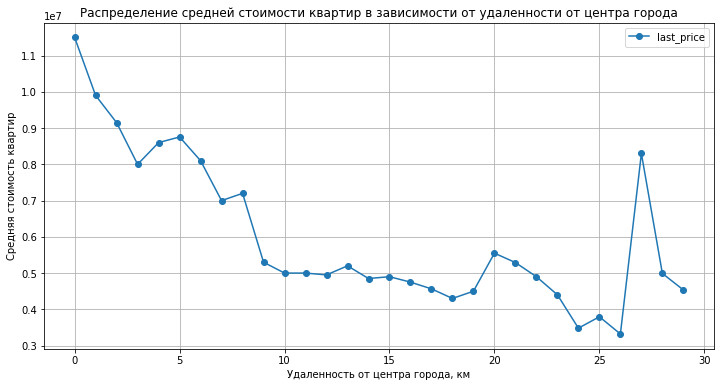

In [108]:
df_2.plot(style='o-', grid=True, figsize=(12, 6))
plt.title('Распределение средней стоимости квартир в зависимости от удаленности от центра города')
plt.xlabel('Удаленность от центра города, км')
plt.ylabel('Средняя стоимость квартир');

Далее попытаемся выяснить причину нетипичного "пика" на графике выше

In [109]:
df.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['count','median']).round(2)

,count,median
,last_price,last_price
cityCenters_nearest_km,,
0.00,17,11500000.00
1.00,159,9900000.00
2.00,250,9150000.00
3.00,316,8000000.00
4.00,629,8600000.00
5.00,823,8755014.00
6.00,536,8100000.00
7.00,367,6999000.00


Таким образом, полученные расчетные значения и их визуализация на графике наглядно свидетельствуют о явной обратной зависимости между стоимостью квартир и их удаленностью от центра города. Причиной же появления "пика" на графике на 27 километре удаленности от центра города может быть то, что именно на этом километре резко выделяется средняя стоимость квартир, представленная всего в 2 объявлениях, что явно является аномальным значением, так как "выбросы" в этом столбце не были удалены, а также возможно к тому же дубликатом так как объявлений именно 2

### Общий вывод

Итак, в описании задания к проекту была сформулирована следующая задача: установить параметры, необходимые для определения рыночной стоимости объектов недвижимости на основе архива объявлений о продаже квартир в городе Санкт-Петербурге и соседних населенных пунктах за несколько лет. Результаты исследования позволят построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

С целью выявления запрашиваемых парметров была произведена оценка наиболее часто встречающихся значений различных признаков продаваемых объектов недвижимости, позволяющая сформировать типичное описание для среднего продаваемого объекта и обьявления о нем:

- площадь продаваемых квартир в среднем составляет от 30 до 65 квадратных метров; если говорить об общей жилой площади, то здесь наиболее популярным значением является размер либо около 18, либо около 30 метров квадратных; наиболее часто встречаемые в продаже квартиры с площадью кухни от 6 до 12 метров квадратных;

- средняя стоимость продаваемых квартир варьируется от 2,5 до 5 миллионов рублей; 

- чаще выставляют на продажу однокомнатные и двухкомнатные квартиры; 

- средняя высота потолков составляет 2,7 метра;

- продажа квартир преимущественно происходит в многоквартирных домах высотой 5 и 10 этажей, расположенных не выше 6 этажа, но при этом не на первом и не на последнем этажах;

- парки находятся в среднем на расстоянии от 400 до 600 метров от продаваемых квартир, несколько дальше от них расположен центр города (от 11 до 16 километров), а удаленность аэропорта - от 10 до 30 километров;

- чаще публкуются обьявления о продаже в будние дни, c февраля по апрель, а также в конце года в октябре-ноябре;

- в среднем квартиры продаются 94 дня;

- большинство выставленых на продажу квартир сосредоточено в таких населенных пунктах, как Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг;

- квартиры с самой высокой средней стоимостью квадратного метра, равной 104 245.39 руб., располагаются в г. Санкт-Петербурге, с самой низкой (58 158.32 руб.) - в Выборге.

Параметрами же для определения рыночной стоимости квартир могут служить:

- общая площадь квартиры, жилая площадь и площадь кухни (существует прямая взаимосвязь между стоимостью квартиры и ее общей и жилой площадями, а также площадью кухни, наиболее четко эта взаимосвязь прослеживается именно на показателе общей площади (ее коэффициент корреляции с ценой рвен - 0.77);

- количество комнат (цена квартиры прямопропорциональна количеству комнат в ней, и она равномерно увеличивается с увеличением количества комнат в квартире);

- тип этажа квартиры (цены на квартиры не на первом и не на последнем этажах несколько выше);

- год публикации обьявления (после 2014 года цены на квартиры резко падали, получив свой минимум в 2016 году, после чего наметился их постепенный рост вплоть до 2019 года, причем разница средней цены 2014 года и 2019 достаточно велика, из чего следует, что год публикации объявления о продаже квартиры существенно влияет на ее цену).

Взамосвязь же между ценой и днем и месяцем публикации объявления о продаже характеризуется как несущественная.

